# Importar Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pandas
## Series
Parece um array, mas possui um rótulo

In [4]:
frutas = ["maçã", "banana", "laranja", "morango"]
quantidades = [10, 15, 8, 12]
serie_frutas = pd.Series(quantidades, index = frutas)

print(serie_frutas)
print(serie_frutas["maçã"])

maçã       10
banana     15
laranja     8
morango    12
dtype: int64
10


## Dataframe
Tabela com os dados

In [5]:
dados = {
    "Nome": ["Vinicius", "Mardegan"],
    "Idade": [19, 20],
    "Cidade": ["Araçatuba", "Prudente"]
}

df = pd.DataFrame(dados)
df

url = "pokemon_data.csv"

df_pokemon = pd.read_csv(url)

df_pokemon.head(3) #mostra as 3 primeiras linhas
df_pokemon.tail(3) #mostra as 3 ultimas linhas
df_pokemon.info() #mostra informações sobre o dataframe
df_pokemon.describe() #mostra informações estatisticas do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
for col_name, series in df_pokemon.items():
    if pd.api.types.is_numeric_dtype(series):
        media = series.mean()
        print(f"Média de {col_name}: {media:.2f}")

Média de #: 362.81
Média de HP: 69.26
Média de Attack: 79.00
Média de Defense: 73.84
Média de Sp. Atk: 72.82
Média de Sp. Def: 71.90
Média de Speed: 68.28
Média de Generation: 3.32
Média de Legendary: 0.08


In [7]:
for index, row in df_pokemon.iterrows():
    print(f"{row['Name']} - {row['HP']}")

Bulbasaur - 45
Ivysaur - 60
Venusaur - 80
VenusaurMega Venusaur - 80
Charmander - 39
Charmeleon - 58
Charizard - 78
CharizardMega Charizard X - 78
CharizardMega Charizard Y - 78
Squirtle - 44
Wartortle - 59
Blastoise - 79
BlastoiseMega Blastoise - 79
Caterpie - 45
Metapod - 50
Butterfree - 60
Weedle - 40
Kakuna - 45
Beedrill - 65
BeedrillMega Beedrill - 65
Pidgey - 40
Pidgeotto - 63
Pidgeot - 83
PidgeotMega Pidgeot - 83
Rattata - 30
Raticate - 55
Spearow - 40
Fearow - 65
Ekans - 35
Arbok - 60
Pikachu - 35
Raichu - 60
Sandshrew - 50
Sandslash - 75
Nidoran (Female) - 55
Nidorina - 70
Nidoqueen - 90
Nidoran (Male) - 46
Nidorino - 61
Nidoking - 81
Clefairy - 70
Clefable - 95
Vulpix - 38
Ninetales - 73
Jigglypuff - 115
Wigglytuff - 140
Zubat - 40
Golbat - 75
Oddish - 45
Gloom - 60
Vileplume - 75
Paras - 35
Parasect - 60
Venonat - 60
Venomoth - 70
Diglett - 10
Dugtrio - 35
Meowth - 40
Persian - 65
Psyduck - 50
Golduck - 80
Mankey - 40
Primeape - 65
Growlithe - 55
Arcanine - 90
Poliwag - 40
P

## Filtrando Dados

In [8]:
# Filtrar por coluna e por linha: todas as linhas entre o indice 50 a 59 da coluna Name
# Serve para qualquer atributo do dataframe
df_pokemon['Name'][50:60]
df_pokemon['HP']

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64

In [9]:
df_grama = df_pokemon[df_pokemon["Type 1"] == "Grass"]
df_grama

#Filtrando todos pokemon de grama da primeira geracao
df_grama1 = df_pokemon[(df_pokemon["Type 1"] == "Grass") & (df_pokemon["Generation"] == 1)]
df_grama1

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
48,43,Oddish,Grass,Poison,45,50,55,75,65,30,1,False
49,44,Gloom,Grass,Poison,60,65,70,85,75,40,1,False
50,45,Vileplume,Grass,Poison,75,80,85,110,90,50,1,False
75,69,Bellsprout,Grass,Poison,50,75,35,70,30,40,1,False
76,70,Weepinbell,Grass,Poison,65,90,50,85,45,55,1,False
77,71,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False


## LOC e ILOC

In [10]:
# Criando um DataFrame de exemplo
data = {
    'Nome': ['Alice', 'Bob', 'Carol', 'David', 'Eva'],
    'Idade': [25, 30, 22, 35, 28],
    'Cidade': ['São Paulo', 'Rio de Janeiro', 'São Paulo', 'Belo Horizonte', 'Curitiba']
}

df = pd.DataFrame(data)
# Definindo a coluna 'Nome' como índice
df.set_index('Nome', inplace=True)
df

,Idade,Cidade
Nome,,
Alice,25,São Paulo
Bob,30,Rio de Janeiro
Carol,22,São Paulo
David,35,Belo Horizonte
Eva,28,Curitiba


In [11]:
# Usando o loc para filtrar linhas e colunas
# Selecionando a linha com rótulo 'Alice' e colunas 'Idade' e 'Cidade'
resultado_loc = df.loc['Alice', :] #pega todos os dados da coluna alice
resultado_loc

Idade            25
Cidade    São Paulo
Name: Alice, dtype: object

# Desafio Prático

In [19]:
#leitura do csv e criação do dataframe
df_cars = pd.read_csv("Automobile.csv")

df_cars.head(3)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa


In [23]:
print(df_cars.shape)
df_cars.describe()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [30]:
df_hp = df_cars["horsepower"]
df_hp

df_lowhp = df_cars[df_cars["horsepower"] <= 60]
df_lowhp

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
19,volkswagen 1131 deluxe sedan,26.0,4,97.0,46.0,1835,20.5,70,europe
55,volkswagen model 111,27.0,4,97.0,60.0,1834,19.0,71,europe
59,volkswagen type 3,23.0,4,97.0,54.0,2254,23.5,72,europe
102,volkswagen super beetle,26.0,4,97.0,46.0,1950,21.0,73,europe
117,fiat 128,29.0,4,68.0,49.0,1867,19.5,73,europe
144,toyota corona,31.0,4,76.0,52.0,1649,16.5,74,japan
181,honda civic cvcc,33.0,4,91.0,53.0,1795,17.5,75,japan
195,chevrolet chevette,29.0,4,85.0,52.0,2035,22.2,76,usa
196,chevrolet woody,24.5,4,98.0,60.0,2164,22.1,76,usa
198,honda civic,33.0,4,91.0,53.0,1795,17.4,76,japan


# MatplotLib

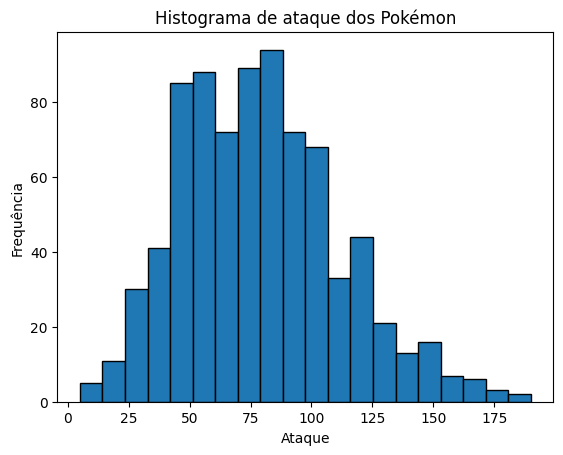

In [13]:
# Filtrar os valores de ataque
ataque_pokemon = df_pokemon['Attack'].dropna()

# Criar o histograma
fig, ax = plt.subplots()
ax.hist(ataque_pokemon, bins=20, edgecolor='black') #tipo é histograma
ax.set_title('Histograma de ataque dos Pokémon')
ax.set_xlabel('Ataque')
ax.set_ylabel('Frequência')
plt.show()

## Subplots

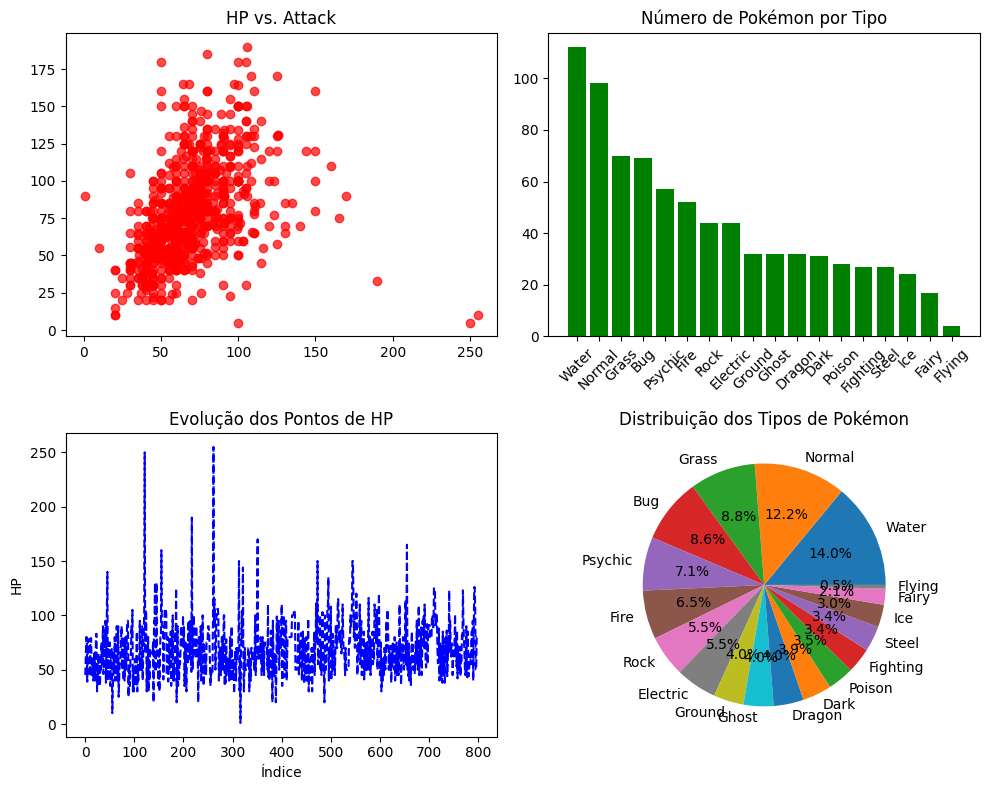

In [14]:
# Cria uma figura com 2 linhas e 2 colunas de subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Gráfico de dispersão entre HP e Attack
axes[0, 0].scatter(df_pokemon['HP'], df_pokemon['Attack'], color='r', alpha=0.7)
axes[0, 0].set_title('HP vs. Attack')

# Gráfico de barras para o número de Pokémon por tipo
pokemon_count_by_type = df_pokemon['Type 1'].value_counts()
axes[0, 1].bar(pokemon_count_by_type.index, pokemon_count_by_type.values, color='g')
axes[0, 1].set_title('Número de Pokémon por Tipo')
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico de linha para visualizar a evolução dos Pontos de HP (HP) ao longo do índice
axes[1, 0].plot(df_pokemon['HP'], color='b', linestyle='--')
axes[1, 0].set_title('Evolução dos Pontos de HP')
axes[1, 0].set_xlabel('Índice')
axes[1, 0].set_ylabel('HP')

# Gráfico de pizza para a distribuição dos tipos de Pokémon
pokemon_type_distribution = df_pokemon['Type 1'].value_counts()
axes[1, 1].pie(pokemon_type_distribution, labels=pokemon_type_distribution.index, autopct='%1.1f%%')
axes[1, 1].set_title('Distribuição dos Tipos de Pokémon')

# Ajusta a distância entre os subplots
plt.tight_layout()

# Exibe a figura com os subplots
plt.show()

## Salvar os Gráficos

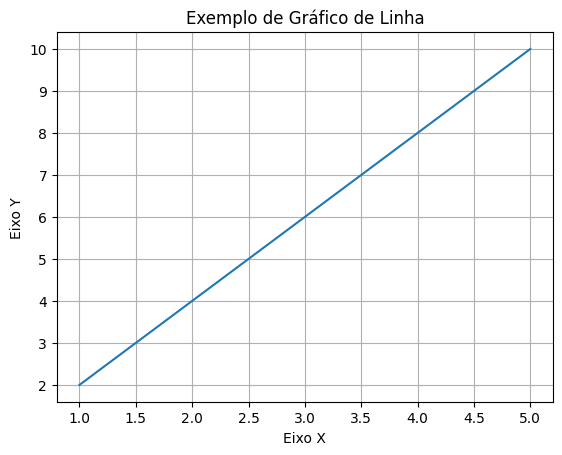

In [15]:
# Dados fictícios para exemplificar o gráfico
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Plota o gráfico de linha
plt.plot(x, y)
plt.title('Exemplo de Gráfico de Linha')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.grid(True)

# Salva o gráfico em formato PNG com alta resolução (300 DPI)
plt.savefig('grafico.png', dpi=300)

# Exibe o gráfico na tela
plt.show()

# Desafio Matplotlib

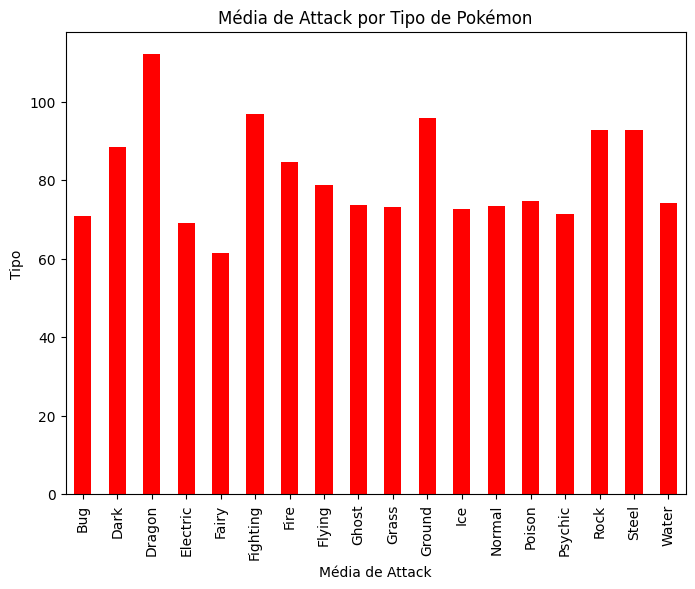

In [18]:
attack_by_type = df_pokemon.groupby("Type 1")["Attack"].mean()

attack_by_type.plot(kind="bar", figsize=(8,6), color="red")
plt.xlabel("Média de Attack")
plt.ylabel("Tipo")
plt.title("Média de Attack por Tipo de Pokémon")
plt.show()